In [23]:
import pandas as pd
import os

In [24]:
dir = '../part1/'
data_basic_path = '../year/'
years = os.listdir(data_basic_path)

### 提取取各年之年齡 (part1/age_cocncat.csv)

In [4]:
df = pd.DataFrame()

for year in years:
    print(year + ' Concating Please wait'+ ' . . . .'  )
    data = pd.read_csv(data_basic_path +  year + '/' + 'ePatient.csv', usecols=['eRecordT01', 'ePatientT04'])
    data["year"] = year
    data = data[['year','eRecordT01','ePatientT04']]

    # data = pd.read_csv(file, low_memory=False)
    df = pd.concat([df, data], axis=0)

concat_path_file = dir + "/{}_concat.csv".format('age')
df.to_csv(concat_path_file, index=False)
print('Success')


2011 Concating Please wait . . . .
2012 Concating Please wait . . . .
2013 Concating Please wait . . . .
2014 Concating Please wait . . . .
2015 Concating Please wait . . . .
2016 Concating Please wait . . . .
2017 Concating Please wait . . . .
2018 Concating Please wait . . . .
2019 Concating Please wait . . . .
2020 Concating Please wait . . . .
2021 Concating Please wait . . . .
2022 Concating Please wait . . . .
Success


### 數據處理

##### 統計各年齡資料筆數

In [35]:
from collections import Counter

age_df = pd.read_csv('../part1/age_concat.csv')

In [26]:
def count(dataFram):
    class_Counter = Counter(dataFram["ePatientT04"])
    # age_range = age_df['ePatientT04'].value_counts() // .value_counts() 不好取值
    return class_Counter

##### 統計年齡分段

In [27]:
# 統計年齡分段 => class_Counter = 個年齡總數 、type = dict
def ageRange_sum(class_Counter):
    young_children, children, teenageers, youth, middle_age, old_age, other_01, other_03 = 0, 0, 0, 0, 0, 0, class_Counter[7701001], class_Counter[7701003]

    for age in class_Counter:
        if age >= 0 and age <= 6: # 嬰幼兒 0~6
            young_children += class_Counter[age]
        elif age >= 7 and age <= 12: # 少年 7~12
            children += class_Counter[age]
        elif age >= 13 and age <= 17: # 青少年 13~17
            teenageers += class_Counter[age]
        elif age >= 18 and age <= 45: # 青年 18~45
            youth += class_Counter[age]
        elif age >= 46 and age <= 69: # 中年 45~69
            middle_age += class_Counter[age]
        elif age > 69: # 老年 
            old_age += class_Counter[age]

    type_sum = [young_children, children, teenageers, youth, middle_age, old_age, other_01, other_03]
    return type_sum

In [28]:
##### 區間建立
age_type = ['0 ~ 6', '7 ~ 12', '13 ~ 17', '18 ~ 45', '45 ~ 69', '>= 69', 'other_01', 'other_03']
##### 每年總數 [] * 12
year_type_sum = []

##### 12 年年齡總筆數

In [9]:
class_Counter = count(age_df)
print(class_Counter)
type_sum = ageRange_sum(class_Counter)
year_type_sum.append(type_sum)

Counter({7701003: 206018, 20: 38395, 19: 36185, 21: 32024, 18: 31320, 22: 28867, 23: 27247, 50: 27012, 60: 26579, 25: 25725, 24: 25390, 40: 22795, 30: 22139, 26: 21684, 70: 20963, 55: 20317, 65: 20157, 28: 19729, 27: 19705, 80: 19583, 58: 18606, 56: 18469, 45: 18418, 35: 18197, 53: 18057, 52: 17934, 57: 17854, 62: 17683, 63: 17508, 54: 17407, 64: 16865, 61: 16814, 38: 16760, 32: 16739, 36: 16708, 48: 16665, 29: 16505, 42: 16494, 51: 16416, 37: 16151, 68: 16102, 43: 16036, 34: 16031, 31: 15962, 47: 15866, 33: 15801, 46: 15744, 67: 15724, 66: 15531, 59: 15248, 82: 15123, 78: 15106, 75: 15065, 72: 14895, 83: 14824, 44: 14783, 85: 14712, 7701001: 14618, 41: 14602, 73: 14533, 84: 14261, 49: 14224, 76: 14086, 81: 13996, 74: 13901, 39: 13705, 71: 13611, 86: 13410, 77: 13409, 69: 12985, 87: 11799, 88: 11777, 90: 11733, 17: 11726, 79: 11659, 16: 8660, 89: 8370, 91: 7487, 92: 6644, 15: 6082, 93: 5319, 14: 4606, 94: 3966, 2: 3847, 13: 3659, 1: 3387, 95: 3376, 12: 3230, 3: 3200, 10: 2554, 4: 2465,

#### 個年年齡比數

In [29]:
for year in years:
    mask  = age_df['year'] == int(year)
    class_Counter = count(age_df[mask])
    print(class_Counter)
    type_sum = ageRange_sum(class_Counter)
    year_type_sum.append(type_sum)

print(year_type_sum)

Counter({7701003: 29811, 19: 2925, 20: 2787, 18: 2578, 21: 2307, 22: 1913, 23: 1884, 50: 1793, 30: 1651, 25: 1607, 60: 1590, 24: 1539, 45: 1481, 28: 1466, 55: 1443, 26: 1406, 40: 1393, 27: 1355, 56: 1322, 52: 1318, 48: 1315, 35: 1312, 36: 1309, 43: 1306, 51: 1302, 46: 1289, 47: 1288, 53: 1284, 80: 1284, 58: 1280, 31: 1272, 42: 1272, 33: 1230, 49: 1207, 32: 1207, 34: 1204, 29: 1202, 57: 1181, 44: 1172, 38: 1164, 54: 1131, 37: 1110, 41: 1105, 70: 1082, 82: 1079, 17: 1070, 83: 1065, 81: 1057, 84: 1054, 61: 1029, 62: 1028, 59: 993, 78: 969, 39: 961, 85: 953, 63: 932, 75: 923, 65: 906, 76: 905, 72: 886, 73: 860, 77: 858, 68: 856, 86: 835, 74: 833, 64: 809, 71: 787, 16: 762, 79: 757, 67: 728, 69: 703, 87: 647, 88: 644, 66: 633, 15: 607, 90: 545, 14: 412, 89: 398, 91: 353, 92: 299, 12: 293, 13: 289, 11: 256, 2: 245, 10: 231, 8: 225, 3: 221, 93: 205, 9: 198, 1: 185, 4: 178, 7: 173, 5: 168, 6: 153, 94: 152, 95: 134, 96: 106, 97: 70, 98: 69, 100: 27, 99: 26, 101: 16, 102: 13, 103: 7, 0: 3, 836: 

### 視覺化數據

In [30]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


##### 12 年分佈圖

In [31]:
##### 行列互換
from numpy import transpose

transposed = transpose(year_type_sum).tolist()
print(transposed)

[[1153, 1254, 1262, 1390, 1511, 1667, 1572, 1686, 1648, 1433, 1336, 1416], [1376, 1289, 1254, 1304, 1292, 1198, 1178, 1142, 1111, 1105, 1049, 1012], [3140, 3256, 3205, 3371, 3081, 3088, 2971, 2689, 2700, 2621, 2609, 2002], [43118, 44886, 46958, 50126, 50724, 50658, 50821, 50644, 50712, 53877, 55991, 45582], [27360, 29348, 30240, 33144, 34716, 37257, 37356, 37570, 38339, 39461, 43855, 37121], [49713, 43869, 43326, 45280, 45289, 45880, 45756, 46151, 46491, 44134, 50706, 45414], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3828, 10790], [29811, 22599, 21088, 20320, 18955, 18355, 17391, 17274, 16091, 13613, 10521, 0]]


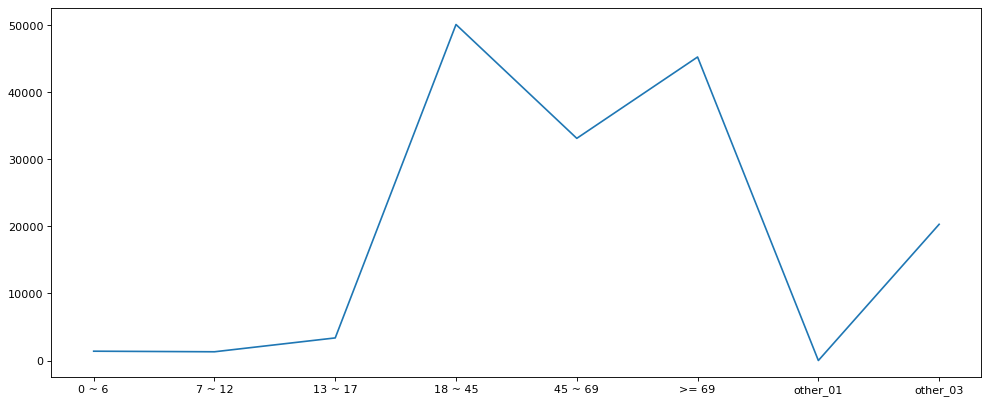

In [32]:
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(age_type, year_type_sum[3])


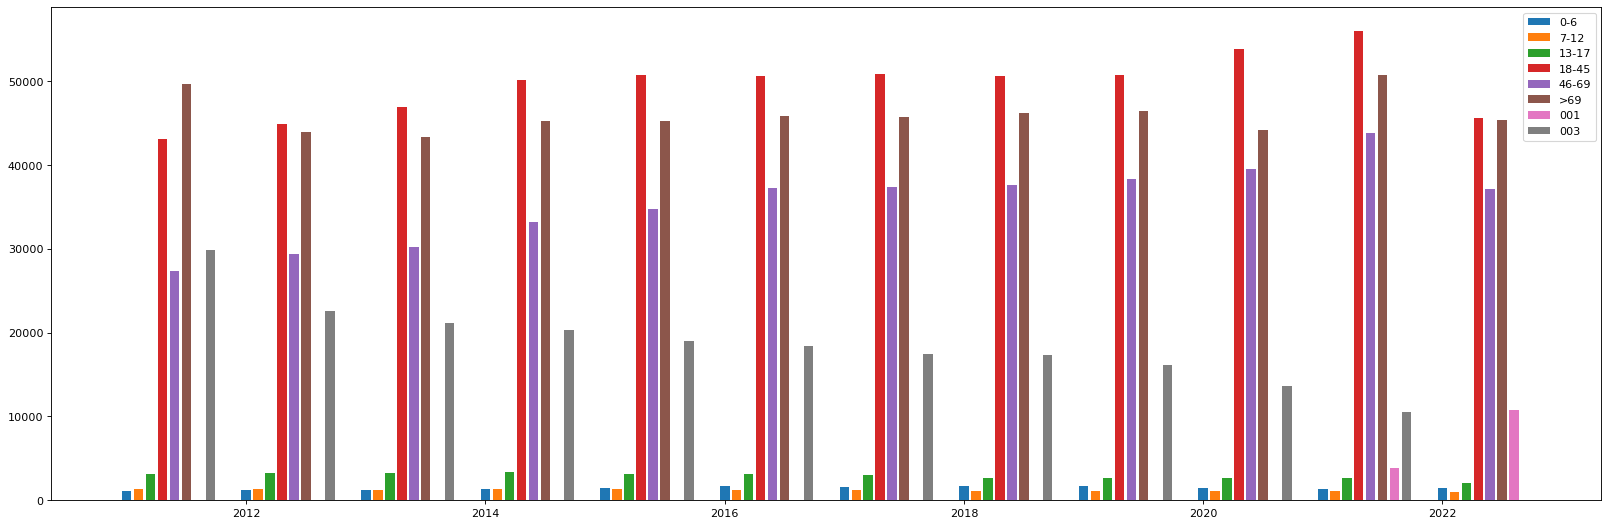

In [33]:
width=0.1


plt.figure(figsize=(25, 8), dpi=80)
x1 = [int(year) for year in years]        #X 軸 (第一組)

y1 = transposed[0]                 #Y 軸1=0056殖利率

x2 = [p + width for p in x1]                        #X 軸 (第二組)
y2 = transposed[1]                    #Y 軸2=0050殖利率

x3 = [p+ 2*width for p in x1]                     #X 軸 (第三組)
y3 = transposed[2]                     #Y 軸3=0052殖利率

x4 = [p + 3*width for p in x1]             #X 軸 (第一組)
y4 = transposed[3]                 #Y 軸1=0056殖利率

x5 = [p + 4*width for p in x1]                        #X 軸 (第二組)
y5 = transposed[4]                    #Y 軸2=0050殖利率
 
x6 = [p + 5*width for p in x1]                     #X 軸 (第三組)
y6 = transposed[5]                     #Y 軸3=0052殖利率

x7 = [p + 6*width for p in x1]          #X 軸 (第一組)
y7 = transposed[6]                 #Y 軸1=0056殖利率

x8 = [p + 7*width for p in x1]                        #X 軸 (第二組)
y8 = transposed[7]                    #Y 軸2=0050殖利率



plt.bar(x1, y1, label='0-6', width=0.08)  #繪製長條圖
plt.bar(x2, y2, label='7-12', width=0.08)  #繪製長條圖
plt.bar(x3, y3, label='13-17', width=0.08)  #繪製長條圖
plt.bar(x4, y4, label='18-45', width=0.08)  #繪製長條圖
plt.bar(x5, y5, label='46-69', width=0.08)  #繪製長條圖
plt.bar(x6, y6, label='>69', width=0.08)  #繪製長條圖
plt.bar(x7, y7, label='001', width=0.08)  #繪製長條圖
plt.bar(x8, y8, label='003', width=0.08)  #繪製長條圖
plt.legend()